In [1]:
!pip install torchsummary

In [2]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install --upgrade torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.1/19.1 MB 33.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 MB 959.5 kB/s eta 0:00:0000:0100:01
  Attempting uninstall: torch
    Found existing installation: torch 1.11.0
    Uninstalling torch-1.11.0:
      Successfully uninstalled torch-1.11.0
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.12.0
    Uninstalling torchvision-0.12.0:
      Successfully uninstalled torchvision-0.12.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fastai 2.6.3 requires torch<1.12,>=1.7.0, but you have torch 1.12.0 which is incompatible.
allennlp 2.9.3 requires torch<1.12.0,>=1.6.0, but you have torch 1.12.0 which is incompatible.
allennlp 2.9.3 requires torchvision<0.13.0,>=0.8.1, but you have torchvision 0.13.0 which is incompatible.
Note: you may need to re

## 1. Data Preprocessing

In [4]:
import numpy as np
import torch 
from torch.utils.data import DataLoader, random_split
import torchvision
import torchvision.transforms as T
from torchvision.datasets import ImageFolder
from torchvision.utils import make_grid, save_image
import matplotlib.pyplot as plt

In [5]:
import os

main_folder = "../input/pins-face-recognition/105_classes_pins_dataset"
listdir = sorted(os.listdir(main_folder))

# list of folder inside main folder
listdir[:10]

['pins_Adriana Lima',
 'pins_Alex Lawther',
 'pins_Alexandra Daddario',
 'pins_Alvaro Morte',
 'pins_Amanda Crew',
 'pins_Andy Samberg',
 'pins_Anne Hathaway',
 'pins_Anthony Mackie',
 'pins_Avril Lavigne',
 'pins_Ben Affleck']

In [6]:
# Image Transformation

mean = [0.485, 0.456, 0.406] # mean of image tensor
std = [0.229, 0.224, 0.225]

normalize_stat = (mean, std)
size = 224

transform = T.Compose([
    T.Resize(size),
    T.CenterCrop(size),
    T.ToTensor(),
    T.Normalize(*normalize_stat)
])

transform

Compose(
    Resize(size=224, interpolation=bilinear, max_size=None, antialias=None)
    CenterCrop(size=(224, 224))
    ToTensor()
    Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
)

In [7]:
dataset = ImageFolder(main_folder, transform=transform)
classes = dataset.classes

print("No. of classes: ", len(classes))
classes[:10]

No. of classes:  105


['pins_Adriana Lima',
 'pins_Alex Lawther',
 'pins_Alexandra Daddario',
 'pins_Alvaro Morte',
 'pins_Amanda Crew',
 'pins_Andy Samberg',
 'pins_Anne Hathaway',
 'pins_Anthony Mackie',
 'pins_Avril Lavigne',
 'pins_Ben Affleck']

In [8]:
print("No. of All images: ", len(dataset))
print("Size of fist image: ", dataset[0][0].size())

No. of All images:  17534
Size of fist image:  torch.Size([3, 224, 224])


In [9]:
def denormal(image):
    image = image.numpy().transpose(1, 2, 0)
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]
    
    image = image * std + mean
    image = np.clip(image, 0, 1)
    return image

def denormalize(x, mean=mean, std=std):
    # 3, H, W, B
    ten = x.clone().permute(1, 2, 3, 0)
    for t, m, s in zip(ten, mean, std):
        t.mul_(s).add_(m)
    
    # B, 3, H, W
    return torch.clamp(ten, 0, 1).permute(3, 0, 1, 2)

(-0.5, 223.5, 223.5, -0.5)

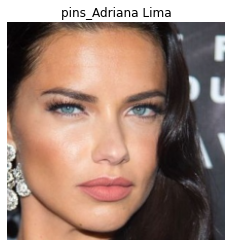

In [10]:
idx = 1
image, label = dataset[idx]

plt.imshow(denormal(image))
plt.title(dataset.classes[label])
plt.axis('off')

In [11]:
# Train and Validation Dataset

torch.manual_seed(42)
num_val = int(len(dataset) * 0.1)

# Random split the image dataset
# Train and Validation
train_data, val_data = random_split(dataset, [len(dataset) - num_val, num_val])
train_data

## Train and Validation DataLoader

In [12]:
# Train and Validation Dataloader
# Define Batch Size

batch_size = 64

train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, pin_memory=True, num_workers=3)
val_loader = DataLoader(val_data, batch_size=batch_size, shuffle=True, pin_memory=False, num_workers=3)

img, lbl = iter(train_loader).next()

print("Batch Size: ", batch_size)

print("No. of Train Data: ", len(train_data))
print("No. of Val Data: ", len(val_data))
print("")
print("No. of training batch: ", len(train_loader))
print("No. of validation batch: ", len(val_loader))

/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 3 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


Batch Size:  64
No. of Train Data:  15781
No. of Val Data:  1753

No. of training batch:  247
No. of validation batch:  28


In [13]:
def show_batch_img(dataloader):
    for images, labels in dataloader:
        fig, ax = plt.subplots(figsize=(12, 12))
        ax.set_xticks([]); ax.set_yticks([])
        denorm_images = denormalize(images)
        make_grid_denorm = make_grid(denorm_images[:64], nrow=8)
        ax.imshow(make_grid_denorm.permute(1, 2, 0).clamp(0, 1))
        break

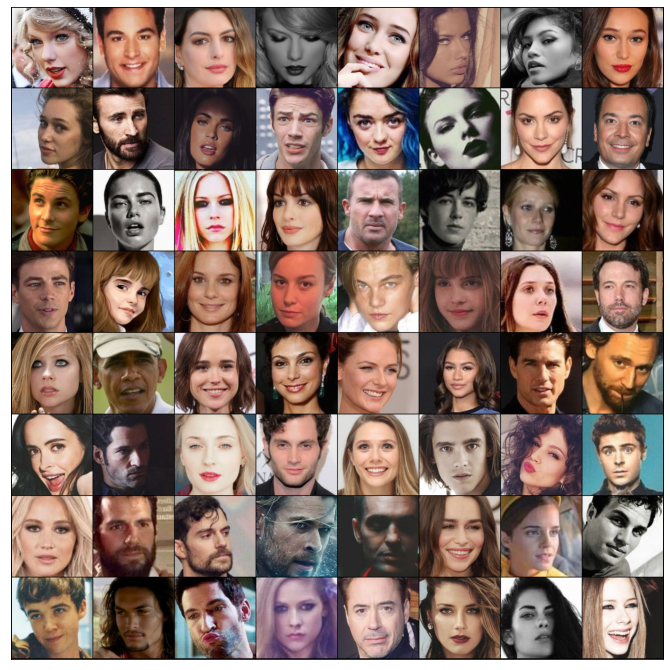

In [14]:
show_batch_img(train_loader)

In [15]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

## 2. Resnet34

In [16]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.models as models
from torchsummary import summary
from glob import glob
from tqdm.notebook import tqdm

In [17]:
model = models.resnet34(pretrained=True)
model

/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [18]:
model = models.resnet34(pretrained=True)
fc_in_features = model.fc.in_features
print("FC layer input feature: ", fc_in_features)
print("No. of classes: ", len(classes))

FC layer input feature:  512
No. of classes:  105


In [19]:
## List of feature layer of Resnet34
# list(models.resnet34(pretrained=True).children())[:-1]

In [20]:
class FaceRecog(nn.Module):
    def __init__(self, num_classes, pretrained=True):
        super().__init__()

        # Pretrained resnet34
        self.resnet34 = models.resnet34(pretrained=True)
        self.features = nn.Sequential(*list(self.resnet34.children())[:-1])
        self.classifier = nn.Sequential(nn.Flatten(),
                                        nn.Linear(in_features=fc_in_features, out_features=len(classes)))

    def forward(self, x):
        x = self.features(x)
        y = self.classifier(x)
        return y

    def summary(self, input_size):
        return summary(self, input_size)

# class FaceRecog(nn.Module):
#     def __init__(self, num_classes, pretrained=True):
#         super(FaceRecog, self).__init__()

#         # Pretrained resnet34
#         self.resnet34 = models.resnet34(pretrained=True)
#         for param in self.resnet34.parameters():
#             param.requires_grad = False
        
#         modified_fc = nn.Linear(in_features = fc_in_features, out_features=len(classes))
#         self.resnet34.fc = modified_fc
        
#     def forward(self, x):
#         return self.resnet34(x)

#     def summary(self, input_size):
#         return summary(self, input_size)
        

In [32]:
model = FaceRecog(num_classes=len(classes)).to(device)
model

FaceRecog(
  (resnet34): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_

In [33]:
model.summary((3, 224, 224))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 112, 112]           9,408
            Conv2d-2         [-1, 64, 112, 112]           9,408
       BatchNorm2d-3         [-1, 64, 112, 112]             128
       BatchNorm2d-4         [-1, 64, 112, 112]             128
              ReLU-5         [-1, 64, 112, 112]               0
              ReLU-6         [-1, 64, 112, 112]               0
         MaxPool2d-7           [-1, 64, 56, 56]               0
         MaxPool2d-8           [-1, 64, 56, 56]               0
            Conv2d-9           [-1, 64, 56, 56]          36,864
           Conv2d-10           [-1, 64, 56, 56]          36,864
      BatchNorm2d-11           [-1, 64, 56, 56]             128
      BatchNorm2d-12           [-1, 64, 56, 56]             128
             ReLU-13           [-1, 64, 56, 56]               0
             ReLU-14           [-1, 64,

## Normal Training

In [36]:
learning_rate = 1e-4
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

def train(epoch, n_epochs, model, train_loader, loss_func, device, optimizer, ds=train_data):
    model.train(True)
    torch.set_grad_enabled(True)
    
    epoch_loss = 0.0
    epochs_acc = 0
    
    tq_batch = tqdm(train_loader, total=len(train_loader))
    for images, labels in tq_batch:
        images = images.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        outs = model(images)
        _, preds = torch.max(outs, 1)
        
        loss = loss_func(outs, labels)

        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        epochs_acc += torch.sum(preds == labels).item()
        
        tq_batch.set_description(f'Epoch [{epoch + 1}/{n_epochs}]')
        tq_batch.set_postfix_str('loss = {:.4f}'.format(loss.item()))

            
    epoch_loss = epoch_loss / len(train_loader)
    epochs_acc = epochs_acc / len(ds)

    return epoch_loss, epochs_acc

In [38]:
def evaluate(model, dl, loss_func, device, ds=val_data):

    model.train(False)

    epoch_loss = 0
    epochs_acc = 0
    tq_batch = tqdm(dl, total=len(dl), leave=False)
    for images, labels in tq_batch:

        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        loss = loss_func(outputs, labels)

        epoch_loss += loss.item()
        epochs_acc += torch.sum(preds == labels).item()
        tq_batch.set_description(f'Evaluate Model')
        
    epoch_loss = epoch_loss / len(dl)
    epochs_acc = epochs_acc / len(ds)

    return epoch_loss, epochs_acc

In [39]:
def fit(n_epochs, model, train_dataloader, valid_dataloader, loss_func, device, optimizer):
    
    history = []
    val_loss_ref = float('inf')
    patient = 5
    for epoch in range(n_epochs):
        torch.cuda.empty_cache()
        loss, acc = train(epoch, n_epochs, model, train_dataloader, loss_func, device, optimizer)
        
        torch.cuda.empty_cache()
        val_loss, val_acc = evaluate(model, valid_dataloader, loss_func, device)
        
        history.append({'loss': loss, 'acc': acc, 'val_loss': val_loss, 'val_acc': val_acc})

        statement = "[loss]={:.4f} - [acc]={:.4f} - \
[val_loss]={:.4f} - [val_acc]={:.4f}".format(loss, acc, val_loss, val_acc,)
        print(statement)
        ####### Checkpoint
        if val_loss < val_loss_ref:
            patient = 5
            val_loss_ref = val_loss
            model_path = './Face_Recognition_checkpoint.pth'
            torch.save(model.state_dict(), model_path)
            print(f"[INFO] Saving model dict, Epoch={epoch + 1}")
        else:
            if patient == 0: 
                break
            print(f"[INFO] {patient} lives left!")
            patient -= 1
            

    return history

In [41]:
num_epochs = 20
res = fit(num_epochs, model, train_loader, val_loader, criterion, device, optimizer)

  0%|          | 0/247 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7f74818d2290>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1481, in __del__
    self._shutdown_workers()
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1464, in _shutdown_workers
    if w.is_alive():
  File "/opt/conda/lib/python3.7/multiprocessing/process.py", line 151, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: Exception ignored in: can only test a child process<function _MultiProcessingDataLoaderIter.__del__ at 0x7f74818d2290>

Exception ignored in: Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/data/dataloader.py", line 1481, in __del__
<function _MultiProcessingDataLoaderIter.__del__ at 0x7f74818d2290>    self._shutdown_workers()
  File "/opt/conda/lib/python3.7/site-packages/torch/utils/d

[loss]=2.7812 - [acc]=0.3665 - [val_loss]=1.4687 - [val_acc]=0.7102
[INFO] Saving model dict, Epoch=1


  0%|          | 0/247 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

[loss]=0.7028 - [acc]=0.7922 - [val_loss]=0.7428 - [val_acc]=0.8483
[INFO] Saving model dict, Epoch=2


  0%|          | 0/247 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

[loss]=0.1348 - [acc]=0.8886 - [val_loss]=0.5442 - [val_acc]=0.8602
[INFO] Saving model dict, Epoch=3


  0%|          | 0/247 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

[loss]=0.0284 - [acc]=0.8994 - [val_loss]=0.3851 - [val_acc]=0.9076
[INFO] Saving model dict, Epoch=4


  0%|          | 0/247 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

[loss]=0.0102 - [acc]=0.9000 - [val_loss]=0.3428 - [val_acc]=0.9133
[INFO] Saving model dict, Epoch=5


  0%|          | 0/247 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

[loss]=0.0060 - [acc]=0.9000 - [val_loss]=0.3315 - [val_acc]=0.9156
[INFO] Saving model dict, Epoch=6


  0%|          | 0/247 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

[loss]=0.0042 - [acc]=0.9000 - [val_loss]=0.3295 - [val_acc]=0.9127
[INFO] Saving model dict, Epoch=7


  0%|          | 0/247 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

[loss]=0.0031 - [acc]=0.9000 - [val_loss]=0.3241 - [val_acc]=0.9110
[INFO] Saving model dict, Epoch=8


  0%|          | 0/247 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

[loss]=0.0025 - [acc]=0.9000 - [val_loss]=0.3259 - [val_acc]=0.9139
[INFO] 5 lives left!


  0%|          | 0/247 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

[loss]=0.0020 - [acc]=0.9000 - [val_loss]=0.3225 - [val_acc]=0.9161
[INFO] Saving model dict, Epoch=10


  0%|          | 0/247 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

[loss]=0.0016 - [acc]=0.9000 - [val_loss]=0.3115 - [val_acc]=0.9179
[INFO] Saving model dict, Epoch=11


  0%|          | 0/247 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

[loss]=0.0013 - [acc]=0.9000 - [val_loss]=0.3069 - [val_acc]=0.9156
[INFO] Saving model dict, Epoch=12


  0%|          | 0/247 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

[loss]=0.0011 - [acc]=0.9000 - [val_loss]=0.3173 - [val_acc]=0.9173
[INFO] 5 lives left!


  0%|          | 0/247 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

[loss]=0.0009 - [acc]=0.9000 - [val_loss]=0.3101 - [val_acc]=0.9150
[INFO] 4 lives left!


  0%|          | 0/247 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

[loss]=0.0008 - [acc]=0.9000 - [val_loss]=0.3071 - [val_acc]=0.9144
[INFO] 3 lives left!


  0%|          | 0/247 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

[loss]=0.0007 - [acc]=0.9000 - [val_loss]=0.3051 - [val_acc]=0.9190
[INFO] Saving model dict, Epoch=16


  0%|          | 0/247 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

[loss]=0.0006 - [acc]=0.9000 - [val_loss]=0.3065 - [val_acc]=0.9196
[INFO] 5 lives left!


  0%|          | 0/247 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

[loss]=0.0005 - [acc]=0.9000 - [val_loss]=0.3051 - [val_acc]=0.9184
[INFO] Saving model dict, Epoch=18


  0%|          | 0/247 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

[loss]=0.0005 - [acc]=0.9000 - [val_loss]=0.3038 - [val_acc]=0.9184
[INFO] Saving model dict, Epoch=19


  0%|          | 0/247 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

[loss]=0.0004 - [acc]=0.9000 - [val_loss]=0.3022 - [val_acc]=0.9196
[INFO] Saving model dict, Epoch=20


In [42]:
def show_results(history):
    accuracy = [res['acc'] for res in history]
    losses = [res['loss'] for res in history]
    val_accuracy = [res['val_acc'] for res in history]
    val_losses = [res['val_loss'] for res in history]
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
    ax1.plot(losses, '-o', label = 'Loss')
    ax1.plot(val_losses, '-o', label = 'Validation Loss')
    ax1.legend()

    ax2.plot(100 * np.array(accuracy), '-o', label = 'Accuracy')
    ax2.plot(100 * np.array(val_accuracy), '-o', label = 'Validation Accuracy')
    ax2.legend();
    
    fig.show()

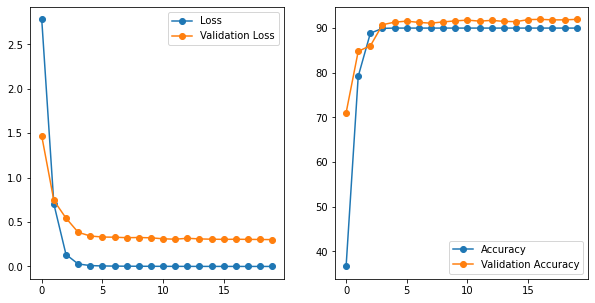

In [43]:
show_results(res)

pins_Marie Avgeropoulos
pins_gal gadot
pins_Rebecca Ferguson
pins_Keanu Reeves
pins_Dwayne Johnson
pins_Lindsey Morgan
pins_Maria Pedraza
pins_Keanu Reeves
pins_Sarah Wayne Callies
pins_Amanda Crew
pins_kiernen shipka
pins_Brenton Thwaites
pins_Chris Hemsworth
pins_Jeremy Renner
pins_Danielle Panabaker
pins_Dominic Purcell


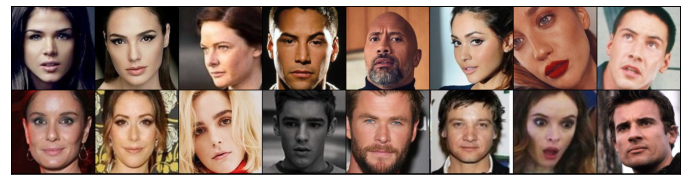

In [47]:
from termcolor import colored

idx = 16
for imgs, lbls in val_loader:
    imgs = imgs.to(device)
    outs = model(imgs)
    _, preds = torch.max(outs, dim = 1)
    fig, ax = plt.subplots(figsize=(12, 12))
    ax.set_xticks([]); ax.set_yticks([])
    denorm_images = denormalize(imgs.cpu())
    ax.imshow(make_grid(denorm_images[:idx], nrow=8).permute(1, 2, 0).clamp(0,1))
    for p, lbl in zip(preds[:idx], lbls[:idx]):
        if lbl == p.cpu():
            print(colored(classes[p], 'green'))
        else:
            print(colored(classes[p], 'red'), colored(classes[lbl], 'blue'))
    break

In [ ]:
# Normal Training Function
def train(train_loader, num_epochs, loss, lr, optimizer):
    for epoch in range(num_epochs):
        
        correct = 0
        total = 0
        
        i = 0
        
        model.train()
        total_batch = len(train_data) // batch_size

        for img, label in tqdm(train_loader):
            img, label = img.to(device), label.to(device)

            outputs = model(img)
            cost = loss(outputs, label)

            optimizer.zero_grad()
            cost.backward()
            optimizer.step()

            _, predicted = torch.max(outputs.data, 1)

            total += label.size(0)
            correct += (predicted == label).sum() 
            i += 1

            if (i+1) % 100 == 0:
                print('Train accuracy: %.2f %%' % (100 * float(correct) / total))
                print("Epoch [%d/%d], Iter [%d/%d], Loss: %.4f" % (epoch+1, num_epochs, i+1, total_batch, cost.item()))

In [28]:
num_epochs = 20
loss = nn.CrossEntropyLoss()
lr = 1e-4
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

train(train_loader, num_epochs, loss, lr, optimizer)

  0%|          | 0/247 [00:00<?, ?it/s]

Train accuracy: 17.69 %
Epoch [1/20], Iter [100/246], Loss: 2.7842
Train accuracy: 34.12 %
Epoch [1/20], Iter [200/246], Loss: 1.8055


  0%|          | 0/247 [00:00<?, ?it/s]

Train accuracy: 53.57 %
Epoch [2/20], Iter [100/246], Loss: 0.8020
Train accuracy: 61.32 %
Epoch [2/20], Iter [200/246], Loss: 0.4547


  0%|          | 0/247 [00:00<?, ?it/s]

Train accuracy: 69.73 %
Epoch [3/20], Iter [100/246], Loss: 0.0925
Train accuracy: 73.94 %
Epoch [3/20], Iter [200/246], Loss: 0.1133


  0%|          | 0/247 [00:00<?, ?it/s]

Train accuracy: 78.37 %
Epoch [4/20], Iter [100/246], Loss: 0.0230
Train accuracy: 80.67 %
Epoch [4/20], Iter [200/246], Loss: 0.0284


  0%|          | 0/247 [00:00<?, ?it/s]

Train accuracy: 83.28 %
Epoch [5/20], Iter [100/246], Loss: 0.0096
Train accuracy: 84.69 %
Epoch [5/20], Iter [200/246], Loss: 0.0094


  0%|          | 0/247 [00:00<?, ?it/s]

Train accuracy: 86.38 %
Epoch [6/20], Iter [100/246], Loss: 0.0078
Train accuracy: 87.33 %
Epoch [6/20], Iter [200/246], Loss: 0.0072


  0%|          | 0/247 [00:00<?, ?it/s]

Train accuracy: 88.51 %
Epoch [7/20], Iter [100/246], Loss: 0.0049
Train accuracy: 89.19 %
Epoch [7/20], Iter [200/246], Loss: 0.0047


  0%|          | 0/247 [00:00<?, ?it/s]

Train accuracy: 90.06 %
Epoch [8/20], Iter [100/246], Loss: 0.0043
Train accuracy: 90.57 %
Epoch [8/20], Iter [200/246], Loss: 0.0025


  0%|          | 0/247 [00:00<?, ?it/s]

Train accuracy: 91.24 %
Epoch [9/20], Iter [100/246], Loss: 0.0030
Train accuracy: 91.65 %
Epoch [9/20], Iter [200/246], Loss: 0.0020


  0%|          | 0/247 [00:00<?, ?it/s]

Train accuracy: 92.17 %
Epoch [10/20], Iter [100/246], Loss: 0.0020
Train accuracy: 92.50 %
Epoch [10/20], Iter [200/246], Loss: 0.0018


  0%|          | 0/247 [00:00<?, ?it/s]

Train accuracy: 92.93 %
Epoch [11/20], Iter [100/246], Loss: 0.0019
Train accuracy: 93.19 %
Epoch [11/20], Iter [200/246], Loss: 0.0016


  0%|          | 0/247 [00:00<?, ?it/s]

Train accuracy: 93.55 %
Epoch [12/20], Iter [100/246], Loss: 0.0013
Train accuracy: 93.77 %
Epoch [12/20], Iter [200/246], Loss: 0.0009


  0%|          | 0/247 [00:00<?, ?it/s]

Train accuracy: 94.07 %
Epoch [13/20], Iter [100/246], Loss: 0.0008
Train accuracy: 94.25 %
Epoch [13/20], Iter [200/246], Loss: 0.0012


  0%|          | 0/247 [00:00<?, ?it/s]

KeyboardInterrupt: 

## Standard Accuracy

In [31]:
model.eval()

correct = 0
total = 0
i=0

for img, label in tqdm(val_loader):
    img = img.to(device)
    label = label.to(device)

    outputs = model(img)
    cost = loss(outputs, label)

    _, predicted = torch.max(outputs.data, 1)

    total += label.size(0)
    correct += (predicted == label).sum()
    i+=1

    if (i+1) % 10 == 0:
        print('Validation accuracy: %.2f %%' % (100 * float(correct) / total))
        print("Epoch [%d/%d], Iter [%d/%d], Loss: %.4f" % (epoch+1, num_epochs, i+1, total_batch, cost.item()))

  0%|          | 0/28 [00:00<?, ?it/s]

Validation accuracy: 91.67 %


NameError: name 'epoch' is not defined